In [5]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/netflix_titles.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
# duration-3, rating-4, date_added-10, country-831, cast-825, director-2634
df.duplicated().sum()

#cleaning
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['year_added']=df['date_added'].dt.year.astype(int)
df['month_added']=df['date_added'].dt.month
df['date_added'].head()

#Duration
df['duration_num']=df['duration'].str.extract('(\d+)').astype(float)
df['duration_type']=df['duration'].str.extract('([A-za-z]+)')
df[['type','duration','duration_num','duration_type']].head()


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2861549085.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num']=df['duration'].str.extract('(\d+)').astype(float)


,type,duration,duration_num,duration_type
0,Movie,90 min,90.0,min
1,TV Show,2 Seasons,2.0,Seasons
2,TV Show,1 Season,1.0,Season
3,TV Show,1 Season,1.0,Season
4,TV Show,2 Seasons,2.0,Seasons


In [19]:
#missing values
df['country'].fillna('Unknown',inplace=True)
df['country_count']=df['country'].apply(lambda x:len(x.split(',')))
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

df.drop(['director','cast'],axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

/tmp/ipython-input-2252592061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown',inplace=True)
/tmp/ipython-input-2252592061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

KeyError: "['director', 'cast'] not found in axis"

In [20]:
df.head()

#content age
from datetime import datetime
current_year=datetime.now().year
df['content_age']=current_year-df['release_year']
df[['release_year','content_age']].head()

#description length feature
df['description_length']=df['description'].apply(lambda x:len(x.split()))

#Genere count feature
df['genre_count']=df['listed_in'].apply(lambda x:len(x.split(',')))

#Normalize Duration(converts TV seasons into a rough numeric scale)
df['duration_clean'] = df.apply(
    lambda x: x['duration_num'] if x['type'] == 'Movie' else x['duration_num'] * 10,
    axis=1
)

#Encode
df['type_encoded']=df['type'].map({'Movie':0,'TV Show':1})

df.head()


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num,duration_type,country_count,content_age,description_length,genre_count,duration_clean,type_encoded
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90.0,min,1,5,27,1,90.0,0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2.0,Seasons,1,4,27,3,20.0,1
2,s3,TV Show,Ganglands,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1.0,Season,1,4,27,3,10.0,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1.0,Season,1,4,24,2,10.0,1
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2.0,Seasons,1,4,24,3,20.0,1


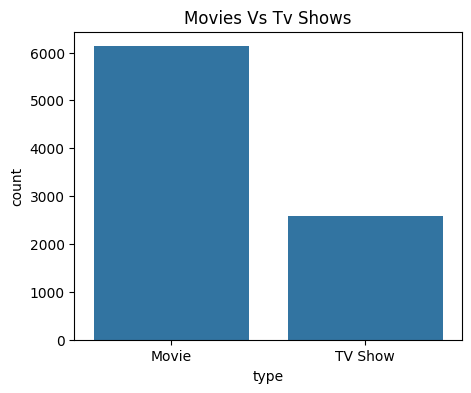

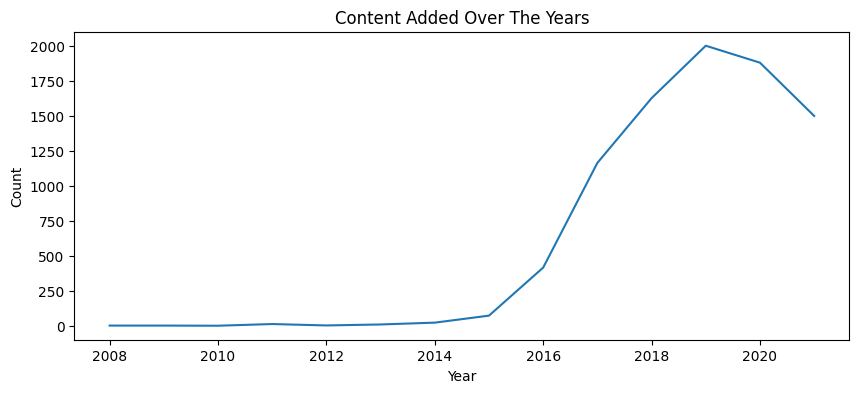

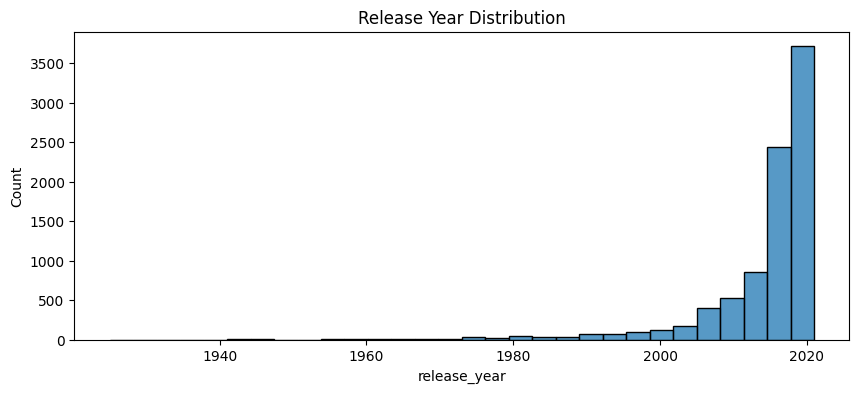

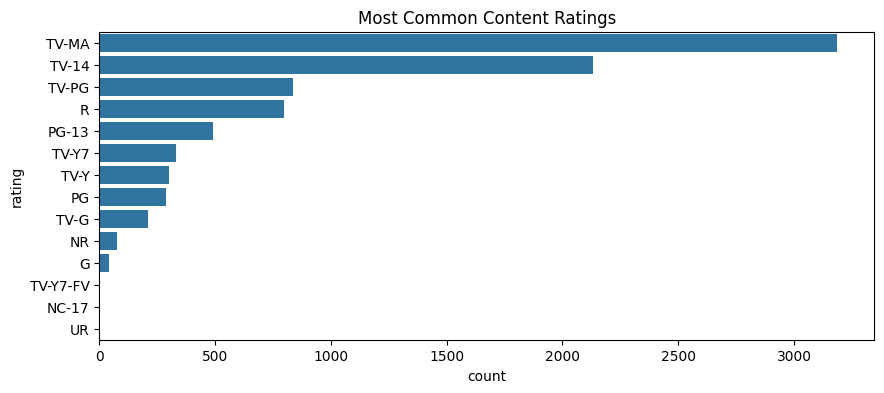

In [26]:
#movies Vs Tv show
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='type')
plt.title("Movies Vs Tv Shows")
plt.show()

#Content added over the years
plt.figure(figsize=(10,4))
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content Added Over The Years')
plt.show()

#release year distribution
plt.figure(figsize=(10,4))
sns.histplot(df['release_year'],bins=30)
plt.title('Release Year Distribution')
plt.show()

# Most common content ratings
plt.figure(figsize=(10,4))
sns.countplot(
    data=df,y='rating',order=df['rating'].value_counts().index
)
plt.title('Most Common Content Ratings')
plt.show()

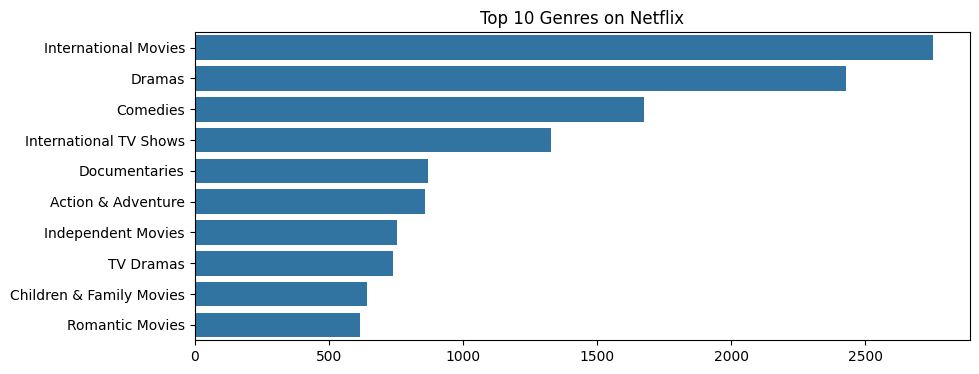

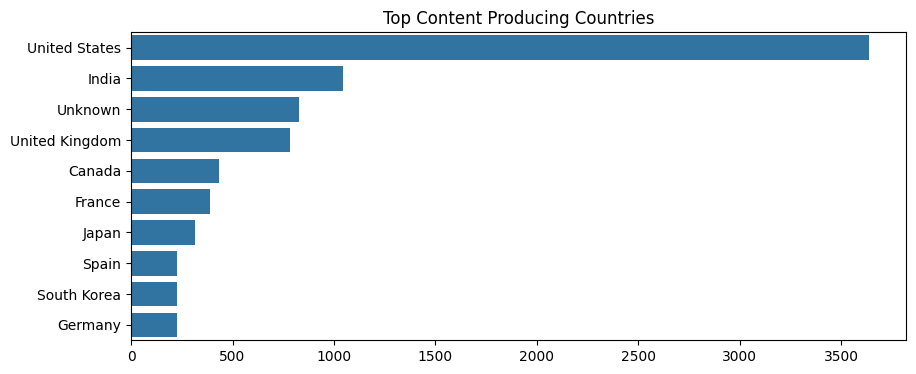

In [28]:
# top genres
from collections import Counter

genres = df['listed_in'].str.split(', ')
all_genres = [g for sublist in genres for g in sublist]

genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(10,4))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()))
plt.title("Top 10 Genres on Netflix")
plt.show()

# Top content producing countries
countries = df['country'].str.split(', ')
all_countries = [c for sublist in countries for c in sublist]

from collections import Counter
country_counts = Counter(all_countries)

top_countries = dict(country_counts.most_common(10))

plt.figure(figsize=(10,4))
sns.barplot(x=list(top_countries.values()), y=list(top_countries.keys()))
plt.title("Top Content Producing Countries")
plt.show()


In [29]:
# feature selection
features=[
    'content_age',
    'duration_clean',
    'country_count',
    'description_length',
    'genre_count'
]
x=df[features]
y=df['type_encoded']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [37]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr=lr.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred_lr)
print("Accuracy:",accuracy)
print(classification_report(y_test,y_pred_lr))

#Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9690011481056258
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1226
           1       0.94      0.95      0.95       516

    accuracy                           0.97      1742
   macro avg       0.96      0.96      0.96      1742
weighted avg       0.97      0.97      0.97      1742

Random Forest Accuracy: 0.9879448909299655
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1226
           1       0.99      0.97      0.98       516

    accuracy                           0.99      1742
   macro avg       0.99      0.98      0.99      1742
weighted avg       0.99      0.99      0.99      1742



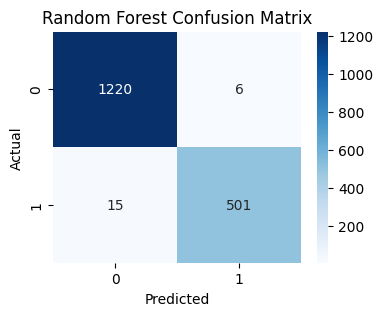

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
import joblib

joblib.dump(rf, "../data/netflix_type_classifier.pkl")
joblib.dump(scaler, "../data/netflix_scaler.pkl")


['../data/netflix_scaler.pkl']